In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Загрузим данные из `csv` файлов:

In [2]:
lectures = pd.read_csv('lectures.csv')
questions = pd.read_csv('questions.csv')
train = pd.read_csv(
    'train.csv',
)

Посмотрим сколько памяти занимает наш основной датасет:

In [3]:
megabyte = 1024 ** 2
megabyte_in_memory = train.memory_usage().sum() / megabyte
print(f"Датасет занимает в памяти {megabyte_in_memory:.2f} Мб")

Датасет занимает в памяти 7723.26 Мб


Посмотрим, какие данные и в каком формате лежат в наших датафреймах, а так же посмотрим базовые статистики. Воспользуемся методами `.sample()` и `.describe()`:

In [4]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [5]:
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [6]:
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [7]:
lectures.sample(5)

,lecture_id,tag,part,type_of
204,16863,74,4,solving question
318,25121,89,5,solving question
240,19567,125,6,concept
347,27683,181,6,concept
299,23815,113,3,concept


In [8]:
questions.sample(5)

,question_id,bundle_id,correct_answer,part,tags
3248,3248,3246,3,4,157 67 38
11838,11838,11836,0,3,136 38 81 29
5151,5151,5151,1,5,8
4951,4951,4951,2,5,8
7534,7534,7534,2,7,98 118 21


In [9]:
train.sample(5)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
5271031,5271031,17838146581,112635403,793,0,924,3,1,12000.0,True
87710475,87710475,462004529,1865967886,613,0,195,3,1,29000.0,True
26738898,26738898,94477602,570626785,984,0,26,0,1,15000.0,True
28535783,28535783,1539409869,609409215,6854,0,259,1,0,51000.0,True
21742563,21742563,85823983,467026020,3635,0,79,2,0,36000.0,True


# Предобработка данных

Мы видим что объём информации значительный, поэтому можно рассмотреть от какой части данных можно избавиться. Например какая часть данных не нужна для проверки наших предположений или как можно преобразовать данные. Из условия задачи ясно, что необходимо проанализировать все предоставленные данные и понять какие из них влияют на успеваемость студентов, задача немного размытая, но попробуем найти такие факторы.

Первым делом проверим нет ли дубликатов в наших таблицах:

In [10]:
print('Train dataframe:', any(train.duplicated()))
print('Questions dataframe:', any(train.duplicated()))
print('Lectures dataframe:', any(lectures.duplicated()))

Train dataframe: False
Questions dataframe: False
Lectures dataframe: False


Дубликатов в данных нет, поэтому удалять их не надо.

Посмотрим на столбцы `timestamp` и `prior_question_elapsed_time`. В своих максимальных значениях они могут достигать достаточно больших значений. Думаю что можно разделить эти значения на 1000 что бы получить секунды (данные в таблице указаны в миллисекундах), округлить полученное дробное число до ближайшего целого значения. Таким образом мы сможем сэкономить место в оперативной памяти за счёт изменения типа данных на int32.

In [11]:
print(f"timestamp column mem usage in Mb: {train['timestamp'].memory_usage() / (1024 ** 2):.2f}")
print(f"prior_question_elapsed_time column mem usage in Mb: {train['prior_question_elapsed_time'].memory_usage() / (1024 ** 2):.2f}")
print(f"timestamp max value: {train['timestamp'].max()}")
print(f"prior_question_elapsed_time max value: {train['prior_question_elapsed_time'].max()}")

timestamp column mem usage in Mb: 772.33
prior_question_elapsed_time column mem usage in Mb: 772.33
timestamp max value: 87425772049
prior_question_elapsed_time max value: 300000.0


Проверим нет ли в интересующих нас столбцах пропусков:

In [12]:
nans_et = len(train[train['prior_question_elapsed_time'].isnull()])
nans_ts = len(train[train['timestamp'].isnull()])
print(f"Пропусков prior_question_elapsed_time: {nans_et}") 
print(f"Пропусков timestamp: {nans_ts}")

Пропусков prior_question_elapsed_time: 2351538
Пропусков timestamp: 0


Заполним пропуски в столбце `prior_question_elapsed_time` средними значениями:

In [13]:
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].fillna(train['prior_question_elapsed_time'].mean())

In [14]:
train['timestamp'] = train['timestamp'].apply(
    lambda x: round(x / 1000, 0)
).astype('int32')
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].apply(
    lambda x: round(x / 1000, 0)
).astype('int16')

In [15]:
print(f"timestamp column mem usage in Mb: {train['timestamp'].memory_usage() / (1024 ** 2):.2f}")
print(f"prior_question_elapsed_time column mem usage in Mb: {train['prior_question_elapsed_time'].memory_usage() / (1024 ** 2):.2f}")
print(f"timestamp max value: {train['timestamp'].max()}")
print(f"prior_question_elapsed_time max value: {train['prior_question_elapsed_time'].max()}")

timestamp column mem usage in Mb: 386.16
prior_question_elapsed_time column mem usage in Mb: 193.08
timestamp max value: 87425772
prior_question_elapsed_time max value: 300


Нам удалось снизить затраты по памяти в этих столбцах примерно в 2 раза.

Данных, которые можно было бы преобразовать к категориальному типу, к сожалению у нас нет, поэтому эту часть преобразований производить не будем.

Последнее что можем сделать - приведём данные о правильных и неправильных ответах к типу `bool` для удобства работы. Заполним поля значениями `None` в тех случаях когда нет данных о корректности ответа.

In [16]:
train['answered_correctly'] = train['answered_correctly'].apply(
    lambda x: None if x == -1 else bool(x)
)

# EDA

## 1) Общие сведения о данных

Построим сводную таблицу по `content_id` и `content_type_id`, что бы посмотреть сколько всего записей для конкретного контента (content_id) для типа контента (лекция или вопрос):

In [17]:
content_pivot = train.pivot_table(
    'row_id',
    columns='content_type_id',
    index='content_id',
    aggfunc='count',
).sort_values(by=1, ascending=False)
content_pivot

content_type_id,0,1
content_id,,
3153,6955.0,37024.0
21411,NaN,27051.0
10540,7801.0,24312.0
29695,NaN,24126.0
15888,NaN,22627.0
...,...,...
13518,868.0,NaN
13519,924.0,NaN
13520,861.0,NaN


Тут мы видим что разные типы контента (0=вопрос, 1=лекция) могут иметь одинаковые идентификаторы, что говорит о том, что объеденять таблицы если и стоит, то не только по `id` но и по типу контента. К сожалению такую операцию сложно осуществить и она займёт много времени, делать это я не вижу смысла.

In [18]:
content_pivot[content_pivot[0] <= 10]

content_type_id,0,1
content_id,,
1484,1.0,NaN
1485,1.0,NaN
1486,1.0,NaN
3557,3.0,NaN
3572,5.0,NaN
5823,1.0,NaN
10005,1.0,NaN
10006,1.0,NaN
10007,1.0,NaN


Мы можем увидеть, что по типу контента "вопрос" у нас есть достаточно много записей которые встречаются не более 10 раз. Т.е. существует большое количество либо редких вопросов, либо вопросов до которых мало кто доходит. На некоторые вопросы ответили всего по одному разу из всех наблюдений.

In [19]:
content_pivot[content_pivot[1] <= 10]

content_type_id,0,1
content_id,,
4705,2877.0,10.0
23144,NaN,9.0
22353,NaN,9.0
25876,NaN,8.0
6220,2334.0,7.0
20852,NaN,5.0
23239,NaN,4.0
32604,NaN,4.0
22326,NaN,3.0


В то же время количество малопросматриваеммых лекций не велико.

Посмотри в таблицу `questions`. Сгруппируем вопросы по бандлам и посмотрим сколько их всего и сколько из них находится в бандлах (относится к какой-либо одной теме):

In [20]:
bundles = questions.groupby('bundle_id')['question_id'].count().sort_values(ascending=False)
display(bundles)
big_bundles = bundles[bundles >= 2].count()
print(f'Количество бандлов вопросов, в которых больше одного вопроса: {big_bundles}')

bundle_id
7006    5
7001    5
6996    5
6991    5
6986    5
       ..
5066    1
5067    1
5068    1
5069    1
5061    1
Name: question_id, Length: 9765, dtype: int64

Количество бандлов вопросов, в которых больше одного вопроса: 1614


Можно заметить, что подавляющее большинство вопросов находится в отдельной группе / бандле, т.е. можно сказать что почти 80% вопросов подаются по одному.

## 2) Общая картина правильных и не правильных 
Построим наглядный график, для того что бы сопоставить отношения правильных и неправильных ответов. Создадим две маски для фильтрации, получим количество данных где записей где было указано что ответ получен правильно и неправильно. На основании этой выборки построим pie chart.

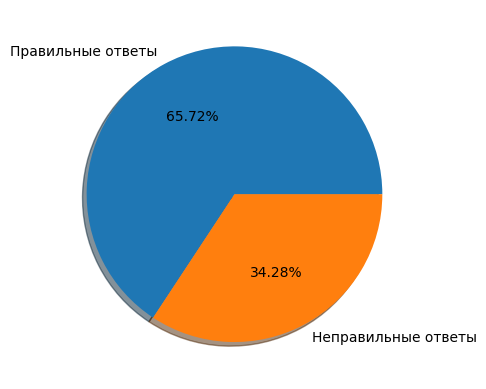

In [21]:
def get_pie_chart():
    correct = train['answered_correctly'] == True
    incorrect = train['answered_correctly'] == False
    plt.pie(
        [train[correct]['answered_correctly'].count(), train[incorrect]['answered_correctly'].count()],
        labels=['Правильные ответы', 'Неправильные ответы'],
        shadow=True,
        autopct=lambda x: f"{x:.2f}%"
    )
    plt.show()

get_pie_chart()

Наглядно видно что правильных ответов дано почти в два раза больше.

## 3) Объяснения вопросов влияет на количество правильных ответов
Можно предположить что просмотр лекций на тематику вопроса и правильных ответов на схожие вопросы должны влиять на количество правильных ответов на вопросы.

Проверим это предположение. Для начала отфильтруем все строки где `answered_correctly != null`, т.е. уберём все лекции из списка. Так же уберём из списка ответы на вопросы, где это ответ на первый вопрос из списка по которому ещё небыло объяснений `prior_question_had_explanation != null`.

Построим сводную таблицу, где в качестве строк будет указание того, это корректный ответ или нет; а в качестве столбцов сумма правильных ответов и сколько всего было ответов.
Так же построим график, что бы наглядно увидеть долю правильных ответов с объяснениями и без них.

,AllAnswers,OnlyRightAnswers
prior_question_had_explanation,,
False,9193234,4602399
True,89685560,60375288


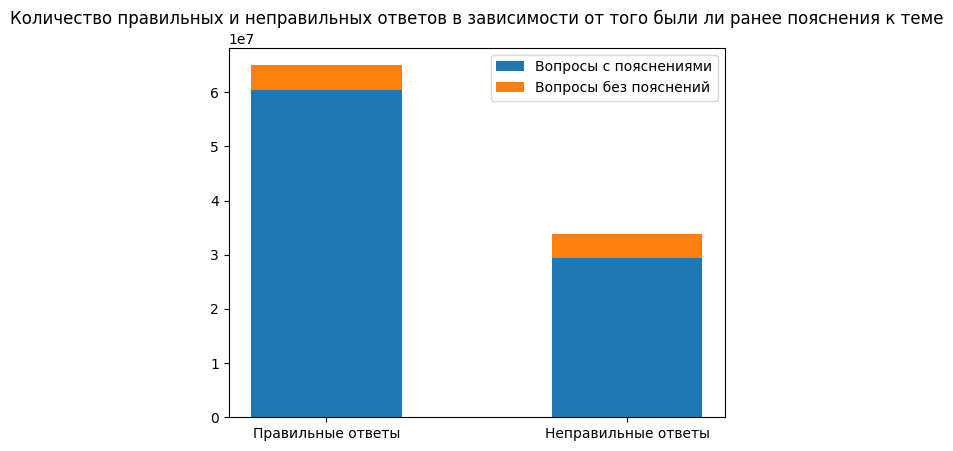

In [22]:
def get_pivot_table():
    m_not_lectures = train['answered_correctly'].notnull()
    m_had_explanation = train['prior_question_had_explanation'].notnull()
    display(
        train[m_not_lectures & m_had_explanation].groupby(
            'prior_question_had_explanation'
        ).agg(
            AllAnswers=('answered_correctly', 'count'),
            OnlyRightAnswers=('answered_correctly', 'sum')
        )
    )

def get_bar_plot():
    correct_answers = train['answered_correctly'] == True
    incorrect_answers = train['answered_correctly'] == False
    expl_not_null = train['prior_question_had_explanation'].notnull()
    expl_true = train[expl_not_null]['prior_question_had_explanation']
    expl_false = ~expl_true
    answ1 = train[correct_answers & expl_true]['answered_correctly'].count()
    answ2 = train[correct_answers & expl_false]['answered_correctly'].count()
    answ3 = train[incorrect_answers & expl_true]['answered_correctly'].count()
    answ4 = train[incorrect_answers & expl_false]['answered_correctly'].count()
    answer_types = (
        "Правильные ответы",
        "Неправильные ответы",
    )
    answers_counts = {
        "Вопросы с пояснениями": [answ1, answ3],
        "Вопросы без пояснений": [answ2, answ4],
    }
    width = 0.5
    fig, ax = plt.subplots()
    bottom = np.zeros(2)
    for label, answer_count in answers_counts.items():
        p = ax.bar(answer_types, answer_count, width=0.5, label=label, bottom=bottom)
        bottom += answer_count
    ax.set_title("Количество правильных и неправильных ответов в зависимости от того были ли ранее пояснения к теме")
    ax.legend(loc="upper right")
    plt.show()

get_pivot_table()
get_bar_plot()

Как можно заметить - на вопросы на темы, по которым ранее были даны объяснения, как правило отвечают правильно гораздо чаще (боле чем в 10 раз). Это утверждение кажется интуитивно понятным.

## 4) Номер ответа в тесте и его влияние на успеваемость
По всей видимости тест стандартизированный и ответ подразумевает выбор из нескольких вариантов. Думаю что стоит проверить распределены ли равномерно правильные ответы по всем вариантам ответов. Иными словами, нет ли какого-нибудь большинства ответов, которые будут правильными, например при выборе 1-го варианта с большей долей этот вариант будет верным.

Для начала посмотрим уникальыне значения вариантов, что бы понять сколько их:

In [24]:
questions['correct_answer'].value_counts().sort_index()

correct_answer
0    3716
1    3478
2    2785
3    3544
Name: count, dtype: int64

Как видно тест состоит и вопросов в которых 4 варианта ответов. Сгруппируем вопросы по правильному варианту и посчитаем количесво вопросов для каждого из варианта.

correct_answer
0    0.274791
1    0.257191
2    0.205945
3    0.262072
Name: proportion, dtype: float64

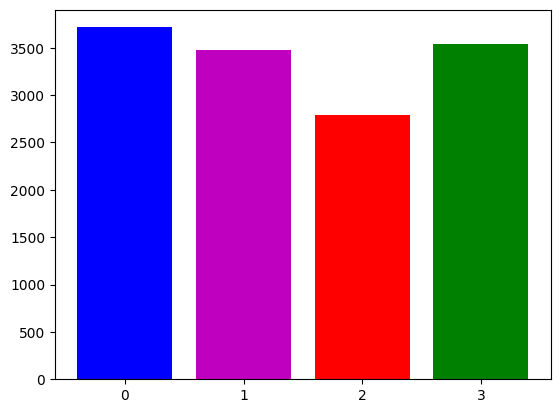

In [25]:
display(questions['correct_answer'].value_counts(normalize=True).sort_index())
# построим наглядный график
plt.bar(
    ["0", "1", "2", "3"],
    questions['correct_answer'].value_counts().sort_index(),
    color=['b', 'm', 'r', 'g'],
)
plt.show()

Как можно заметить, значения распределены достаточно равномерно, но вариант под номером `2` наименее часто бывает правильным ответом. Примерно на 5-7% меньше чем остальные варианты. Можно сказать, что выбирая этот вариант студенты с меньшей вероятностью будут правы.

Теперь посмотрим как часто студенты выбирают варианты ответов для вопросов:

In [26]:
m_content_type = train['content_type_id'] == 0 # выбираем только вопросы
pivot = train[m_content_type].pivot_table(
    "row_id",
    index="content_id",
    columns="user_answer",
    aggfunc="count"
)
pivot

user_answer,0,1,2,3
content_id,,,,
0,6266.0,342.0,209.0,86.0
1,561.0,6589.0,74.0,174.0
2,24890.0,850.0,6178.0,12987.0
3,17906.0,314.0,861.0,3892.0
4,2808.0,5671.0,3796.0,19461.0
...,...,...,...,...
13518,40.0,6.0,139.0,683.0
13519,189.0,166.0,41.0,528.0
13520,88.0,78.0,579.0,116.0


В сводной таблице можно увидеть, что некоторые варианты ответов вообще никогда не выбираются студентами.

Сгруппируем все ответы по всем вопросам и посмотрим как распределено их колличество:

In [27]:
train[m_content_type]['user_answer'].value_counts(normalize=True).sort_index()

user_answer
0    0.283934
1    0.271881
2    0.181422
3    0.262763
Name: proportion, dtype: float64

На первый взгляд можно сделать сказать что не совсем равномерное распределение правильных ответов по вариантам нивелируется тем что студенты как правило не выбирают вариант ответа под номером `2`, поэтому это не должно сильно влиять на успеваемость.

## 5) Время на ответ
Попробуем посмотреть влияет ли как-либо время затраченное на ответ на успешность ответа.

Для начала посмотрим как распределена величина `prior_question_elapsed_time`:

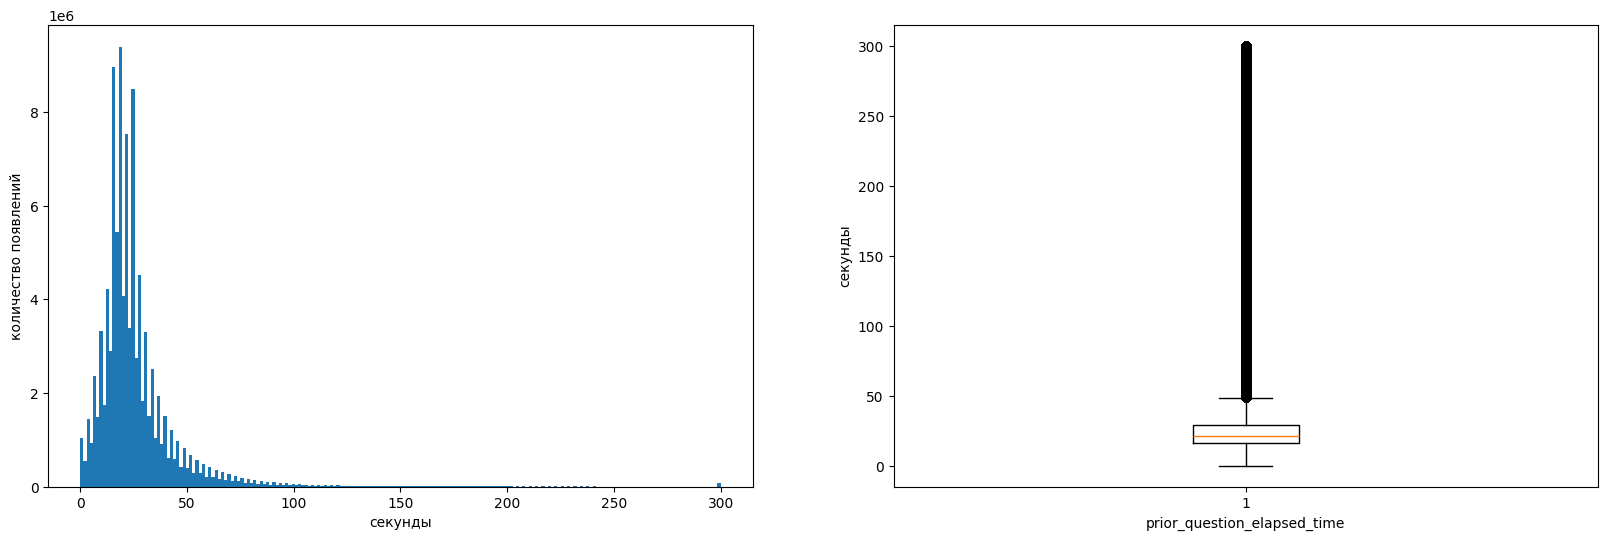

In [28]:
fig = plt.figure(figsize=(20, 6))
fig.text = "some"
fig1 = fig.add_subplot(1,2,1)
fig1.hist(
    train['prior_question_elapsed_time'],
    bins=200,
)
fig1.set_xlabel('секунды')
fig1.set_ylabel('количество появлений')
fig2 = fig.add_subplot(1,2,2)
fig2.boxplot(train['prior_question_elapsed_time'])
fig2.set_ylabel('секунды')
fig2.set_xlabel('prior_question_elapsed_time')
plt.show()

Как мы можем заметить, в большенстве своём студенты тратят от 10 до 70 секунд на ответ на вопрос. Разобъём затраченное время на категории по 10 секунд, добавим новое категориальное поле.

In [29]:
def chose_time_category(value):
    if value < 10:
        return '< 10'
    elif 10 <= value < 20:
        return '10 - 20'
    elif 20 <= value < 30:
        return '20 - 30'
    elif 30 <= value < 40:
        return '30 - 40'
    elif 40 <= value < 50:
        return '40 - 50'
    elif 50 <= value <= 60:
        return '50 - 60'
    elif 60 <= value <= 70:
        return '60 - 70'
    else:
        return '> 70'

train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].apply(chose_time_category).astype('category')

In [30]:
all_answers = train[train['answered_correctly'].notnull()]['row_id'].count()
pivot = train.pivot_table(
    'row_id',
    columns='answered_correctly',
    index='prior_question_elapsed_time',
    aggfunc=['count', lambda x: len(x) / all_answers],
    observed=False
)
pivot.columns = pivot.columns.set_levels(['Answers count in group', 'Answers in group / All answers'], level=0)
pivot

Answers count in group            \
answered_correctly                           False     True    
prior_question_elapsed_time                                    
10 - 20                                   11307906  23046897   
20 - 30                                   10232214  20402064   
30 - 40                                    4300217   7639630   
40 - 50                                    1946453   3435547   
50 - 60                                    1117368   2034328   
60 - 70                                     564287   1046631   
< 10                                       3565954   5874163   
> 70                                        992274   1765367   

                            Answers in group / All answers            
answered_correctly                                   False     True   
prior_question_elapsed_time                                           
10 - 20                                           0.113909  0.232161  
20 - 30                                           0.103073  0.205518  
30 - 40                                           0.043318  0.076957  
40 - 50                                           0.019607  0.034608  
50 - 60                                           0.011256  0.020493  
60 - 70                                           0.005684  0.010543  
< 10                                              0.035921  0.059173  
> 70                                              0.009996  0.017783

В сводной таблице мы видим интересную закономерность - кажется что от времени потраченного на ответ на вопрос никак не зависит правильность ответа. Во всех категориях студенты в приблизительно в два раза больше давали правильных ответов чем не правильных.

# Вывод
В ходе EDA, я смог уменьшить размер датафрейма, применив базовые преобразования данных, а так же смог проанализировать основные показатели исходя из сводных таблиц и графиков. Я могу сделать вывод что наибольшее влияние на общую успеваемость всех студентов оказывает тот факт, получали ли они объяснения до ответа на вопрос или нет. Прогнозирование успеваемости одного отдельного студента, на основании предоставленных данных, мне видется сложным, потому что, по моему мнению, этих данных недостаточно. 